In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data_df = pd.read_csv("mouse_drug_data.csv")
#mouse_drug_data_df.head()

clinical_trial_data_df = pd.read_csv("clinicaltrial_data.csv")
#clinical_trial_data_df.head()
# Combine the data into a single dataset
combine_data = pd.merge(mouse_drug_data_df,clinical_trial_data_df, on="Mouse ID")


# Display the data table for preview

combine_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_data_grouped = combine_data.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]
#combine_data_grouped
#Convert to DataFrame
combine_data_grouped_df = pd.DataFrame(combine_data_grouped).reset_index()
# Preview DataFrame
combine_data_grouped_df.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_data_grouped_df_sem = combine_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
#print(combine_data_grouped_df_sem)
# Convert to DataFrame
population_sem_df = pd.DataFrame(combine_data_grouped_df_sem)

# Preview DataFrame

population_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
population_sem_df = population_sem_df.reset_index()
population_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames
combine_data_grouped_df_reformatted = combine_data_grouped_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
combine_data_grouped_df_reformatted

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
population_sem_df_pivot = population_sem_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


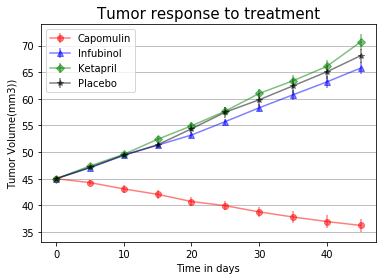

In [10]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

plt.title("Tumor response to treatment").set_size(15)
plt.xlabel("Time in days")
plt.ylabel("Tumor Volume(mm3))")
x_axis = combine_data_grouped_df_reformatted.index
plt.grid(axis= "y")
y_axis = combine_data_grouped_df_reformatted["Capomulin"]
#y_axis_1 =  combine_data_grouped_df_reformatted["Ceftamin"]
y_axis_2 = combine_data_grouped_df_reformatted["Infubinol"]
y_axis_3 = combine_data_grouped_df_reformatted["Ketapril"]
#y_axis_4 = combine_data_grouped_df_reformatted["Naftisol"]
y_axis_5 = combine_data_grouped_df_reformatted["Placebo"]
#y_axis_6 = combine_data_grouped_df_reformatted["Propriva"]
#y_axis_7 = combine_data_grouped_df_reformatted["Ramicane"]
#y_axis_8 = combine_data_grouped_df_reformatted["Stelasyn"]
#y_axis_9 = combine_data_grouped_df_reformatted["Zoniferol"]

ax.errorbar(x_axis, y_axis, yerr=population_sem_df_pivot["Capomulin"], fmt="o", color="r",
                 alpha=0.5, label="Capomulin", linestyle = "solid")
#ax.errorbar(x_axis, y_axis_1, yerr=population_sem_df_pivot["Ceftamin"], fmt="o", color="r",
                 #alpha=0.5, label="Mean of Tumor", linestyle = "solid")

ax.errorbar(x_axis, y_axis_2, yerr=population_sem_df_pivot["Infubinol"], fmt="^", color="b",
                 alpha=0.5, label="Infubinol", linestyle = "solid")
ax.errorbar(x_axis, y_axis_3, yerr=population_sem_df_pivot["Ketapril"], fmt="D-", color="g",
                 alpha=0.5, label="Ketapril", linestyle = "solid")
#ax.errorbar(x_axis, y_axis_4, yerr=population_sem_df_pivot["Naftisol"], fmt="o", color="c",
                # alpha=0.5, label="Mean of Tumor", linestyle = "solid")

ax.errorbar(x_axis, y_axis_5, yerr=population_sem_df_pivot["Placebo"], fmt="*", color="k",
                 alpha=0.5, label="Placebo", linestyle = "solid")
plt.legend(loc="best")
#ax.errorbar(x_axis, y_axis_6, yerr=population_sem_df_pivot["Propriva"], fmt="o", color="#7E2F8E",
                # alpha=0.5, label="Mean of Tumor", linestyle = "solid")

#ax.errorbar(x_axis, y_axis_7, yerr=population_sem_df_pivot["Ramicane"], fmt="o", color="#4DBEEE",
                # alpha=0.5, label="Mean of Tumor", linestyle = "solid")
#ax.errorbar(x_axis, y_axis_8, yerr=population_sem_df_pivot["Stelasyn"], fmt="o", color="#D95319",
                # alpha=0.5, label="Mean of Tumor", linestyle = "solid")

#ax.errorbar(x_axis, y_axis_9, yerr=population_sem_df_pivot["Zoniferol"], fmt="o", color="#EDB120",
               #  alpha=0.5, label="Mean of Tumor", linestyle = "solid")

#ax.set_xlim(0, len(combine_data_grouped) + 1)

    # Save the Figure
plt.savefig("Tumor Response to Treatment")

plt.show()

In [11]:
# Show the Figure
#plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combine_data_msmean= combine_data.groupby(['Drug', 'Timepoint']).mean()["Metastatic Sites"]
# Convert to DataFrame
combine_data_msmean_df = pd.DataFrame(combine_data_msmean)
# Preview DataFrame
combine_data_msmean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [13]:
combine_data_msmean_df_reset = pd.DataFrame(combine_data_msmean_df).reset_index()
combine_data_msmean_df_reset.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combine_data_msmean_sem = combine_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']
# Convert to DataFrame
combine_data_msmean_sem_df = pd.DataFrame(combine_data_msmean_sem)
# Preview DataFrame
combine_data_msmean_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [15]:
combine_data_msmean_sem_df_reset = combine_data_msmean_sem_df.reset_index()
combine_data_msmean_sem_df_reset.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
combine_data_msmean_sem_df_reset_pivot = combine_data_msmean_sem_df_reset.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
combine_data_msmean_sem_df_reset_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [17]:
# Minor Data Munging to Re-Format the Data Frames
combine_data_msmean_df_reformat = combine_data_msmean_df_reset.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
# Preview that Reformatting worked
combine_data_msmean_df_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


<function matplotlib.pyplot.show(*args, **kw)>

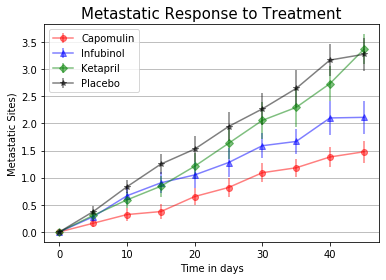

In [18]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

plt.title("Metastatic Response to Treatment").set_size(15)
plt.xlabel("Time in days")
plt.ylabel("Metastatic Sites)")
plt.grid(axis= "y")
x_axis = combine_data_msmean_df_reformat.index
y_axis = combine_data_msmean_df_reformat["Capomulin"]
ax.errorbar(x_axis, y_axis, yerr=combine_data_msmean_sem_df_reset_pivot["Capomulin"], fmt="o", color="r",
                alpha=0.5, label="Capomulin", linestyle = "solid")
y_axis_2 = combine_data_msmean_df_reformat["Infubinol"]
ax.errorbar(x_axis, y_axis_2, yerr=combine_data_msmean_sem_df_reset_pivot["Infubinol"], fmt="^", color="b",
                alpha=0.5, label="Infubinol", linestyle = "solid")
y_axis_3 = combine_data_msmean_df_reformat["Ketapril"]
ax.errorbar(x_axis, y_axis_3, yerr=combine_data_msmean_sem_df_reset_pivot["Ketapril"], fmt="D-", color="g",
                alpha=0.5, label="Ketapril", linestyle = "solid")

y_axis_4 = combine_data_msmean_df_reformat["Placebo"]
ax.errorbar(x_axis, y_axis_4, yerr=combine_data_msmean_sem_df_reset_pivot["Placebo"], fmt="*", color="k",
                alpha=0.5, label="Placebo", linestyle = "solid")

plt.legend(loc="upper left")

# Save the Figure
plt.savefig("Metastatic Response")
# Show the Figure
plt.show

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combine_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
#mice_count.head()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
# Preview DataFrame
mice_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [20]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_df_reformat = mice_count_df.reset_index()
# Preview the Data Frame
mice_count_df_reformat.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
mice_count_df_reformat_pivot = mice_count_df_reformat.pivot(index='Timepoint', columns='Drug')['Mouse ID']
mice_count_df_reformat_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


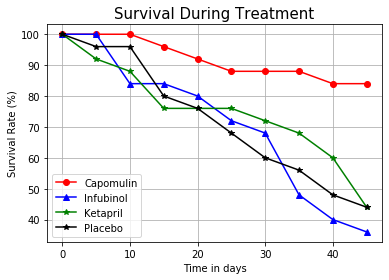

In [22]:

# Generate the Plot (Accounting for percentages)


fig, ax = plt.subplots()

plt.title("Survival During Treatment").set_size(15)
plt.xlabel("Time in days")
plt.ylabel("Survival Rate (%)")
plt.grid(axis= "both")
x_axis = mice_count_df_reformat_pivot.index
y_axis = mice_count_df_reformat_pivot["Capomulin"]/25*100
pl_1 = plt.plot(x_axis, y_axis, marker="o",color = "r", linestyle = "solid", label="Capomulin")
y_axis_2 = mice_count_df_reformat_pivot["Infubinol"]/25*100
pl_2 = plt.plot(x_axis, y_axis_2, marker="^",color = "b", linestyle = "solid", label ="Infubinol")
y_axis_3 = mice_count_df_reformat_pivot["Ketapril"]/25*100
pl_3 = plt.plot(x_axis, y_axis_3, marker="*",color = "g", linestyle = "solid", label="Ketapril")

y_axis_4 = mice_count_df_reformat_pivot["Placebo"]/25*100
pl_4 = plt.plot(x_axis, y_axis_4, marker="*",color = "k", linestyle = "solid", label ="Placebo")

plt.legend(loc="best")
# Save the Figure

plt.savefig("Survival Mice")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
df_1 = (combine_data_grouped_df_reformatted.iloc[9, :]-45)*100/45
df_1 
# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

In [24]:
# Store all Relevant Percent Changes into a Tuple

#drug = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

#tumor_growth = [-19.475303, 46.123472, 46.123472, 51.297960]
#x_axis = np.arange(len(tumor_growth))
##plt.axhline(0, color="grey")
##plt.ylabel("% Tumor Volume Change")
#plt.title("Tumor Change Over 45 Day Treatment")
#bar_graph = plt.bar(drug, tumor_growth, facecolor = "r", align="center")

#bar_graph[0].set_color('g')
#plt.grid(axis= "both", which = "minor")

#for i, num in enumerate[tumor_growth]:
    #bar_graph.annotate(num, ([drug][i], [tumor_growth][i]))
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes

#for i in bar_graph.patches:
   # bar_graph.text(i.get_y()+.12, i.get_height()-3, \
           # str(round((i.get_height()/[tumor_growth], 2))+'%', fontsize=22,
             #   color='white')
    #bar_graph.annotate(num, ([drug][i], [tumor_growth][i])
# Call functions to implement the function calls


# Save the Figure

#plt.savefig("Tumor Change")
# Show the Figure
#plt.show()

SyntaxError: invalid syntax (<ipython-input-24-1ef2b46a3994>, line 35)

![Metastatic Spread During Treatment](../Images/change.png)

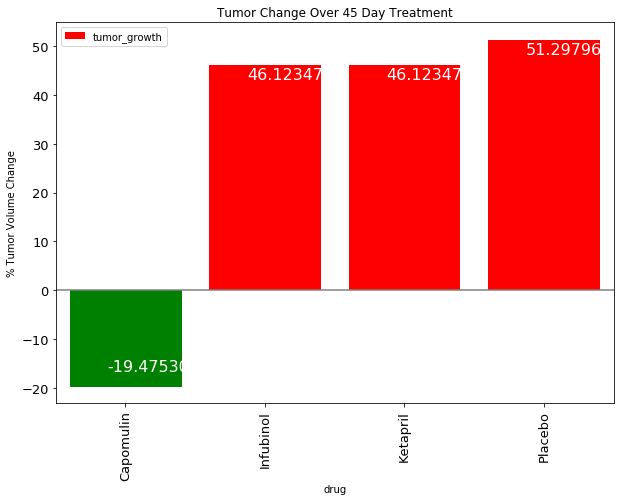

In [29]:
# Store all Relevant Percent Changes into a Tuple

drug = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

tumor_growth = [-19.475303, 46.123472, 46.123472, 51.297960]

ax = pd.DataFrame({
    "drug": drug,
    "tumor_growth": tumor_growth
}).set_index("drug").plot(kind="bar", figsize=(10, 7), color="red", fontsize=13)

totals = []


for i in ax.patches:
    value = tumor_growth[ax.patches.index(i)]
    if(value < 0):
        ax.text(i.get_x() + .12, i.get_height()+3, str(value), fontsize=16, color='white')
    else:
        ax.text(i.get_x() + .12, i.get_height()-3, str(value), fontsize=16, color='white')

# x_axis = np.arange(len(tumor_growth))
plt.axhline(0, color="grey")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
bar_graph = plt.bar(drug, tumor_growth, facecolor = "r", align="center")

bar_graph[0].set_color('g')
# plt.grid(axis= "both", which = "minor")

# #for i, num in enumerate[tumor_growth]:
#     #bar_graph.annotate(num, ([drug][i], [tumor_growth][i]))
# # Splice the data between passing and failing drugs


# # Orient widths. Add labels, tick marks, etc. 


# # Use functions to label the percentages of changes

# for i in bar_graph.patches:
#     bar_graph.text(i.get_y()+.12, i.get_height()-3, \
#             str(round((i.get_height()/[tumor_growth], 2))+'%', fontsize=22,
#                 color='white')
#     #bar_graph.annotate(num, ([drug][i], [tumor_growth][i])
# # Call functions to implement the function calls


#  Save the Figure

plt.savefig("Tumor Change")
# # Show the Figure
plt.show()